In [48]:
import sys
import pandas as pd
import pickle
import numpy as np
import nltk
nltk.download()
from nltk.book import *
from nltk import word_tokenize
from nltk.corpus import stopwords
import datetime
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [25.0, 15.0]
import re
import string 
import dateparser
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [19]:
with open('ley2013.txt') as f:
    ley = f.read()

In [20]:
all_tokens = ley.split()

In [21]:
print(ley)

ARTíCULO 1°. OBJETO. El objeto de la presente leyes garantizar el ejercicio pleno del Derecho a la Salud Mental a la población colombiana, priorizando a los niños, las niñas y adolescentes, mediante la promoción de la salud y la prevención del trastorno mental, la Atención Integral e Integrada en Salud Mental en el ámbito del Sistema General de Seguridad Social en Salud, de conformidad con lo preceptuado en el artículo 49 de la Constitución y con fundamento en el enfoque promocional de Calidad de vida y la estrategia y principios de la Atención Primaria en Salud. De igual forma se establecen los criterios de política para la reformulación, implementación y evaluación de la Política Pública Nacional de Salud Mental, con base en los enfoques de derechos, territorial y poblacional por etapa del ciclo vital. ARTíCULO 2°. ÁMBITO DE APLICACiÓN. La presente leyes aplicable al Sistema General de Seguridad Social en Salud, especifica mente al Ministerio de Salud y Protección Social, Superintend

In [22]:
alpha = [w for w in all_tokens if w.isalpha()]
alpha

['ARTíCULO',
 'El',
 'objeto',
 'de',
 'la',
 'presente',
 'leyes',
 'garantizar',
 'el',
 'ejercicio',
 'pleno',
 'del',
 'Derecho',
 'a',
 'la',
 'Salud',
 'Mental',
 'a',
 'la',
 'población',
 'priorizando',
 'a',
 'los',
 'las',
 'niñas',
 'y',
 'mediante',
 'la',
 'promoción',
 'de',
 'la',
 'salud',
 'y',
 'la',
 'prevención',
 'del',
 'trastorno',
 'la',
 'Atención',
 'Integral',
 'e',
 'Integrada',
 'en',
 'Salud',
 'Mental',
 'en',
 'el',
 'ámbito',
 'del',
 'Sistema',
 'General',
 'de',
 'Seguridad',
 'Social',
 'en',
 'de',
 'conformidad',
 'con',
 'lo',
 'preceptuado',
 'en',
 'el',
 'artículo',
 'de',
 'la',
 'Constitución',
 'y',
 'con',
 'fundamento',
 'en',
 'el',
 'enfoque',
 'promocional',
 'de',
 'Calidad',
 'de',
 'vida',
 'y',
 'la',
 'estrategia',
 'y',
 'principios',
 'de',
 'la',
 'Atención',
 'Primaria',
 'en',
 'De',
 'igual',
 'forma',
 'se',
 'establecen',
 'los',
 'criterios',
 'de',
 'política',
 'para',
 'la',
 'implementación',
 'y',
 'evaluación',
 'de'

In [4]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
punctuation = string.punctuation + '–¡¿”“•\r´'
punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´'

In [6]:
def no_punct(string):
    transtable = string.maketrans('', '', punctuation)
    return string.translate(transtable)

In [23]:
tokens_no_punct = list(map(no_punct, all_tokens))
tokens_no_punct

['ARTíCULO',
 '1°',
 'OBJETO',
 'El',
 'objeto',
 'de',
 'la',
 'presente',
 'leyes',
 'garantizar',
 'el',
 'ejercicio',
 'pleno',
 'del',
 'Derecho',
 'a',
 'la',
 'Salud',
 'Mental',
 'a',
 'la',
 'población',
 'colombiana',
 'priorizando',
 'a',
 'los',
 'niños',
 'las',
 'niñas',
 'y',
 'adolescentes',
 'mediante',
 'la',
 'promoción',
 'de',
 'la',
 'salud',
 'y',
 'la',
 'prevención',
 'del',
 'trastorno',
 'mental',
 'la',
 'Atención',
 'Integral',
 'e',
 'Integrada',
 'en',
 'Salud',
 'Mental',
 'en',
 'el',
 'ámbito',
 'del',
 'Sistema',
 'General',
 'de',
 'Seguridad',
 'Social',
 'en',
 'Salud',
 'de',
 'conformidad',
 'con',
 'lo',
 'preceptuado',
 'en',
 'el',
 'artículo',
 '49',
 'de',
 'la',
 'Constitución',
 'y',
 'con',
 'fundamento',
 'en',
 'el',
 'enfoque',
 'promocional',
 'de',
 'Calidad',
 'de',
 'vida',
 'y',
 'la',
 'estrategia',
 'y',
 'principios',
 'de',
 'la',
 'Atención',
 'Primaria',
 'en',
 'Salud',
 'De',
 'igual',
 'forma',
 'se',
 'establecen',
 'los

In [24]:
lower = [w.lower() for w in tokens_no_punct]
lower

['artículo',
 '1°',
 'objeto',
 'el',
 'objeto',
 'de',
 'la',
 'presente',
 'leyes',
 'garantizar',
 'el',
 'ejercicio',
 'pleno',
 'del',
 'derecho',
 'a',
 'la',
 'salud',
 'mental',
 'a',
 'la',
 'población',
 'colombiana',
 'priorizando',
 'a',
 'los',
 'niños',
 'las',
 'niñas',
 'y',
 'adolescentes',
 'mediante',
 'la',
 'promoción',
 'de',
 'la',
 'salud',
 'y',
 'la',
 'prevención',
 'del',
 'trastorno',
 'mental',
 'la',
 'atención',
 'integral',
 'e',
 'integrada',
 'en',
 'salud',
 'mental',
 'en',
 'el',
 'ámbito',
 'del',
 'sistema',
 'general',
 'de',
 'seguridad',
 'social',
 'en',
 'salud',
 'de',
 'conformidad',
 'con',
 'lo',
 'preceptuado',
 'en',
 'el',
 'artículo',
 '49',
 'de',
 'la',
 'constitución',
 'y',
 'con',
 'fundamento',
 'en',
 'el',
 'enfoque',
 'promocional',
 'de',
 'calidad',
 'de',
 'vida',
 'y',
 'la',
 'estrategia',
 'y',
 'principios',
 'de',
 'la',
 'atención',
 'primaria',
 'en',
 'salud',
 'de',
 'igual',
 'forma',
 'se',
 'establecen',
 'los

In [25]:
alpha = [w for w in lower if not w.isdigit()]
alpha

['artículo',
 '1°',
 'objeto',
 'el',
 'objeto',
 'de',
 'la',
 'presente',
 'leyes',
 'garantizar',
 'el',
 'ejercicio',
 'pleno',
 'del',
 'derecho',
 'a',
 'la',
 'salud',
 'mental',
 'a',
 'la',
 'población',
 'colombiana',
 'priorizando',
 'a',
 'los',
 'niños',
 'las',
 'niñas',
 'y',
 'adolescentes',
 'mediante',
 'la',
 'promoción',
 'de',
 'la',
 'salud',
 'y',
 'la',
 'prevención',
 'del',
 'trastorno',
 'mental',
 'la',
 'atención',
 'integral',
 'e',
 'integrada',
 'en',
 'salud',
 'mental',
 'en',
 'el',
 'ámbito',
 'del',
 'sistema',
 'general',
 'de',
 'seguridad',
 'social',
 'en',
 'salud',
 'de',
 'conformidad',
 'con',
 'lo',
 'preceptuado',
 'en',
 'el',
 'artículo',
 'de',
 'la',
 'constitución',
 'y',
 'con',
 'fundamento',
 'en',
 'el',
 'enfoque',
 'promocional',
 'de',
 'calidad',
 'de',
 'vida',
 'y',
 'la',
 'estrategia',
 'y',
 'principios',
 'de',
 'la',
 'atención',
 'primaria',
 'en',
 'salud',
 'de',
 'igual',
 'forma',
 'se',
 'establecen',
 'los',
 'cr

In [26]:
len(alpha)

6672

In [27]:
len(set(alpha))

1264

In [28]:
freqdist = nltk.FreqDist(alpha)
freqdist

FreqDist({'de': 669, 'y': 345, 'la': 342, 'en': 256, 'salud': 240, 'el': 170, 'mental': 149, 'los': 132, 'las': 123, 'a': 113, ...})

In [29]:
freqdist.most_common()

[('de', 669),
 ('y', 345),
 ('la', 342),
 ('en', 256),
 ('salud', 240),
 ('el', 170),
 ('mental', 149),
 ('los', 132),
 ('las', 123),
 ('a', 113),
 ('para', 89),
 ('del', 83),
 ('atención', 71),
 ('con', 68),
 ('artículo', 61),
 ('que', 61),
 ('social', 53),
 ('servicios', 46),
 ('ministerio', 45),
 ('o', 45),
 ('nacional', 43),
 ('un', 43),
 ('ley', 39),
 ('e', 35),
 ('su', 35),
 ('integral', 34),
 ('prevención', 31),
 ('protección', 30),
 ('presente', 28),
 ('lo', 27),
 ('promoción', 25),
 ('sus', 25),
 ('acciones', 24),
 ('por', 23),
 ('derecho', 21),
 ('política', 21),
 ('trastorno', 20),
 ('personas', 20),
 ('como', 19),
 ('se', 18),
 ('pública', 18),
 ('al', 18),
 ('sistema', 17),
 ('planes', 17),
 ('integrada', 16),
 ('una', 16),
 ('territoriales', 16),
 ('trabajo', 16),
 ('rehabilitación', 15),
 ('no', 15),
 ('deberán', 15),
 ('garantizar', 14),
 ('evaluación', 14),
 ('derechos', 14),
 ('tratamiento', 14),
 ('consejo', 14),
 ('conformidad', 13),
 ('este', 13),
 ('deberá', 13),


In [30]:
from nltk.corpus import stopwords
# Grab stopwords in Spanish
stopwords_esp = stopwords.words('spanish')
stopwords_esp

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosostros',
 'vosostras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestr

In [31]:
tokens_no_stop = [w for w in alpha if w not in stopwords_esp]
tokens_no_stop

['artículo',
 '1°',
 'objeto',
 'objeto',
 'presente',
 'leyes',
 'garantizar',
 'ejercicio',
 'pleno',
 'derecho',
 'salud',
 'mental',
 'población',
 'colombiana',
 'priorizando',
 'niños',
 'niñas',
 'adolescentes',
 'mediante',
 'promoción',
 'salud',
 'prevención',
 'trastorno',
 'mental',
 'atención',
 'integral',
 'integrada',
 'salud',
 'mental',
 'ámbito',
 'sistema',
 'general',
 'seguridad',
 'social',
 'salud',
 'conformidad',
 'preceptuado',
 'artículo',
 'constitución',
 'fundamento',
 'enfoque',
 'promocional',
 'calidad',
 'vida',
 'estrategia',
 'principios',
 'atención',
 'primaria',
 'salud',
 'igual',
 'forma',
 'establecen',
 'criterios',
 'política',
 'reformulación',
 'implementación',
 'evaluación',
 'política',
 'pública',
 'nacional',
 'salud',
 'mental',
 'base',
 'enfoques',
 'derechos',
 'territorial',
 'poblacional',
 'etapa',
 'ciclo',
 'vital',
 'artículo',
 '2°',
 'ámbito',
 'aplicación',
 'presente',
 'leyes',
 'aplicable',
 'sistema',
 'general',
 'se

In [32]:
freqdist = nltk.FreqDist(tokens_no_stop)
freqdist.most_common()

[('salud', 240),
 ('mental', 149),
 ('atención', 71),
 ('artículo', 61),
 ('social', 53),
 ('servicios', 46),
 ('ministerio', 45),
 ('nacional', 43),
 ('ley', 39),
 ('integral', 34),
 ('prevención', 31),
 ('protección', 30),
 ('presente', 28),
 ('promoción', 25),
 ('acciones', 24),
 ('derecho', 21),
 ('política', 21),
 ('trastorno', 20),
 ('personas', 20),
 ('pública', 18),
 ('sistema', 17),
 ('planes', 17),
 ('integrada', 16),
 ('territoriales', 16),
 ('trabajo', 16),
 ('rehabilitación', 15),
 ('deberán', 15),
 ('garantizar', 14),
 ('evaluación', 14),
 ('derechos', 14),
 ('tratamiento', 14),
 ('consejo', 14),
 ('conformidad', 13),
 ('deberá', 13),
 ('vigilancia', 13),
 ('implementación', 12),
 ('través', 12),
 ('programas', 12),
 ('entes', 12),
 ('sustancias', 12),
 ('población', 11),
 ('calidad', 11),
 ('veces', 11),
 ('empresas', 11),
 ('mentales', 11),
 ('humano', 11),
 ('', 11),
 ('red', 11),
 ('prestación', 11),
 ('colombiana', 10),
 ('niños', 10),
 ('niñas', 10),
 ('adolescentes

In [39]:
not_of_interest = ['', 'página','mmv','así','zvtn','da','acciones','objeto','priorizando','servicios','da','ley','artículo','presente','1°','colombiana']

In [40]:
tokens_of_interest = [w for w in tokens_no_stop if w not in not_of_interest]
tokens_of_interest

['leyes',
 'garantizar',
 'ejercicio',
 'pleno',
 'derecho',
 'salud',
 'mental',
 'población',
 'niños',
 'niñas',
 'adolescentes',
 'mediante',
 'promoción',
 'salud',
 'prevención',
 'trastorno',
 'mental',
 'atención',
 'integral',
 'integrada',
 'salud',
 'mental',
 'ámbito',
 'sistema',
 'general',
 'seguridad',
 'social',
 'salud',
 'conformidad',
 'preceptuado',
 'constitución',
 'fundamento',
 'enfoque',
 'promocional',
 'calidad',
 'vida',
 'estrategia',
 'principios',
 'atención',
 'primaria',
 'salud',
 'igual',
 'forma',
 'establecen',
 'criterios',
 'política',
 'reformulación',
 'implementación',
 'evaluación',
 'política',
 'pública',
 'nacional',
 'salud',
 'mental',
 'base',
 'enfoques',
 'derechos',
 'territorial',
 'poblacional',
 'etapa',
 'ciclo',
 'vital',
 '2°',
 'ámbito',
 'aplicación',
 'leyes',
 'aplicable',
 'sistema',
 'general',
 'seguridad',
 'social',
 'salud',
 'especifica',
 'mente',
 'ministerio',
 'salud',
 'protección',
 'social',
 'superintendencia

In [41]:
tokens_nltk = nltk.Text(tokens_of_interest)
tokens_nltk

<Text: leyes garantizar ejercicio pleno derecho salud mental población...>

In [43]:
acuerdo_nltk = nltk.Text(acuerdo.split())
acuerdo_nltk

<Text: ARTíCULO 1°. OBJETO. El objeto de la presente...>

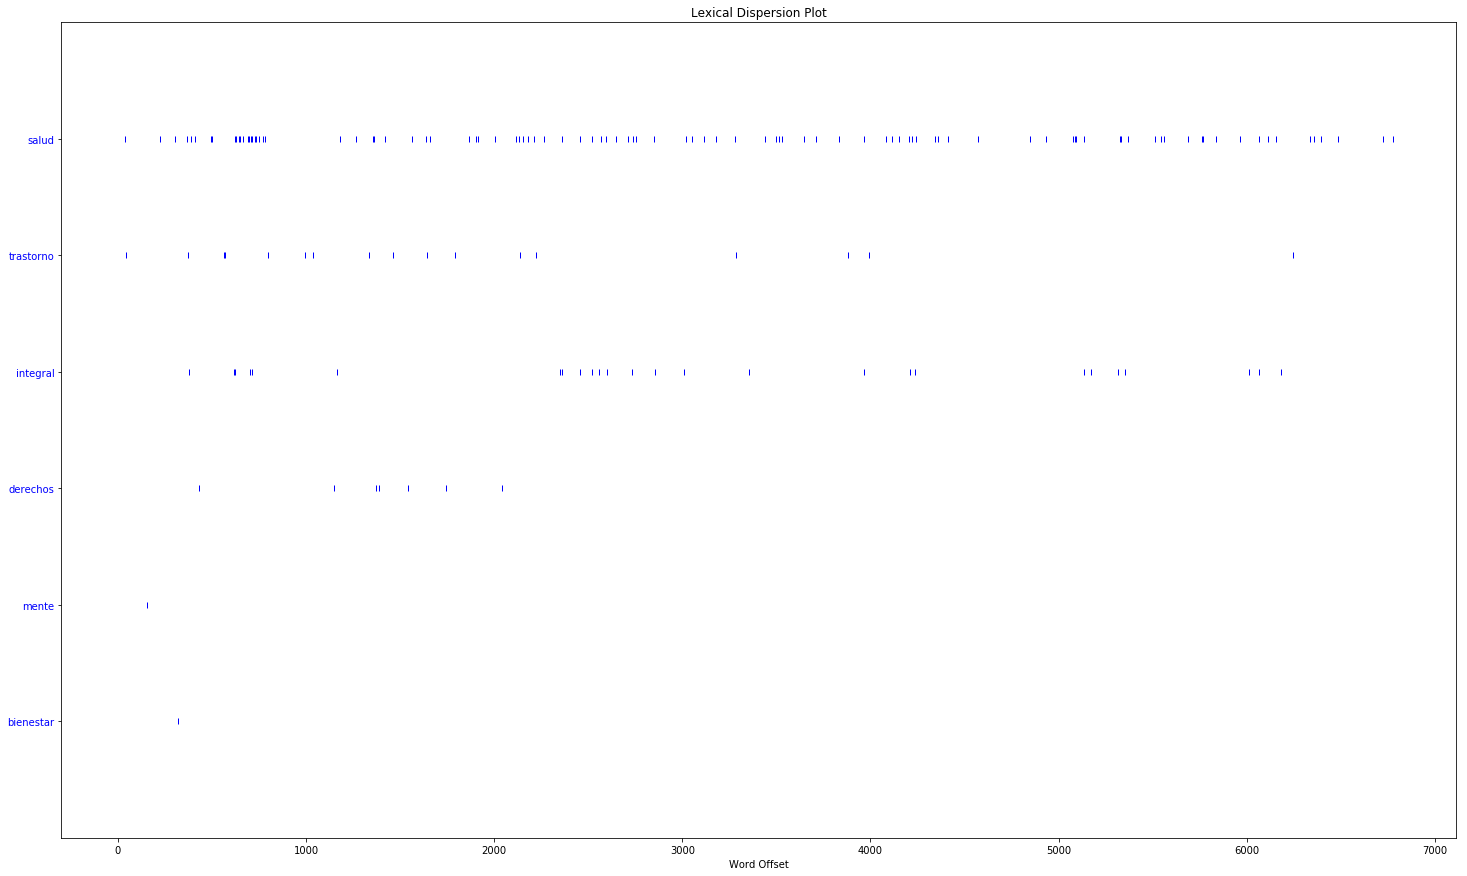

In [49]:
acuerdo_nltk.dispersion_plot(["salud","trastorno","integral","derechos","mente","bienestar"])